In [3]:
import pandas as pd
import getpass
from sqlalchemy import create_engine
from sqlalchemy.exc import ResourceClosedError
import MySQLdb 
# check = False
# import json

In [4]:
class MySQLConnection:
    def __init__(self,user,hostname,db):
        self.user = str(user)
        self.hostname = str(hostname)
        self.db = str(db)
        pword = getpass.getpass("Enter password for user {}".format(user))
        # self.cnx = mysql.connector.connect(host=self.hostname,user=self.user, password=pword,database=self.db)
        self.engine = create_engine("mysql+mysqlconnector://{}:{}@{}/{}".format(user,pword,hostname,db))
        self.cnx = self.engine.connect()
    
    def write_to_db(self, df, table_name):
        try:
            df.to_sql(table_name,con = self.cnx,if_exists='fail',index=False)
        except Exception as e:
            print("\n SQL Write error with: ")
            print(df,"\n", e)
    
    def query(self,q):
        try:
            res = pd.read_sql(q,self.cnx)
            return res
        except ResourceClosedError:
            print("Query success, nothing was returned")
        except Exception as e:
            print("\n    !!!ERROR!!!\n")
            print(e)

In [6]:
sql = MySQLConnection('oskars_s','ec2-13-53-140-41.eu-north-1.compute.amazonaws.com','classicmodels')

Enter password for user oskars_s········


In [7]:
sql.query("show tables")

,Tables_in_classicmodels
0,customers
1,employees
2,offices
3,order_cust
4,orderdetails
5,orderdetails_income
6,orderdetails_incomes
7,orderdetails_w_income
8,orders
9,payments


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b3b593c10>]],
      dtype=object)

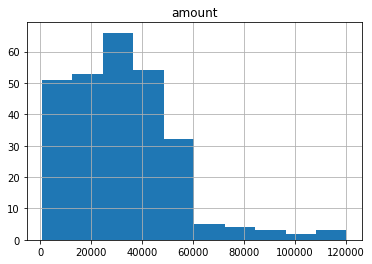

In [13]:
# Uzdevums:
# Uzzīmējiet histogrammu, kurā uz x ass ir pasūtījuma cenas intervāls un uz y ass ir biežums ar pasūtījumiem, 
# kas iekrīt attiecīgajos intervālos
# Ko var secināt no šiem datiem?


# sql.query("select count(*) from payments where amount < 3000")
# sql.query("select productdescription from products limit 20")
df = sql.query("select amount from payments")
df.hist(bins=10)

In [40]:
# Uzdevums:
# Ir izveidota tabula products_2, kurā productscale (produkta izmērs mērogā) ir pārvērsts par skaitli. 
sql.query("create temporary table prods as select * from products")
sql.query("update prods set productscale = substring(productscale,3)")
sql.query("create table products_2 as select *,cast(productscale as unsigned) as productscale_int from prods")
sql.query("drop table prods")
# 0) Pārbaudiet vai šī darbība ir izpildīta pareizi, 
# noliekot blakus sākotnējo productscale un productscale_int kolonnas
# 1) Saglabājiet preces cenas python sarakstā X un preces izmērus sarakstā y
# 2) Attēlojiet korelāciju scatter grafikā starp preces izmēru un cenu.

import matplotlib.pyplot as plt


In [6]:
from sklearn.linear_model import LinearRegression

# Uzdevums:
# Izlasiet dokumentāciju par python bibliotēkas sklearn lineārās regresijas moduli.
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# 1) Veiciet lineāro regresiju
# 2) Izprintējiet R^2 parametru
# 3) Izprintējiet korelācijas koeficientus

In [8]:
# Uzdevums:
# Atrodiet 10 preces, kurām būtu jāuzliek atlaide 
# (10 preces, kurām quantityinstock un kopējā vēsturiskā pārdošanas apjoma attiecība ir vislielākā)

,buyprice
0,103.42
1,101.51
2,98.58
3,98.30
4,95.59
...,...
105,22.57
106,21.75
107,20.61
108,16.24
